# Quantitative exploratory data analysis
> A Summary of lecture "Statistical Thinking in Python (Part 1)", via datacamp

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Data Science, Statistics]
- image: images/petal-ecdf.png

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

df = pd.read_csv('./dataset/iris.csv')
renamed_columns = ['sepal length (cm)', 'sepal width (cm)', 
                   'petal length (cm)', 'petal width (cm)', 'species']
df.columns = renamed_columns
versicolor_petal_length = df[df['species'] == 'Versicolor']['petal length (cm)']
setosa_petal_length = df[df['species'] == 'Setosa']['petal length (cm)']
virginica_petal_length = df[df['species'] == 'Virginica']['petal length (cm)']
versicolor_petal_width = df[df['species'] == 'Versicolor']['petal width (cm)']

## Introduction to summary statistics: The sample mean and median


### Computing means
The mean of all measurements gives an indication of the typical magnitude of a measurement. It is computed using ```np.mean()```.

In [2]:
# compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


## Percentiles, outliers, and box plots


### Compute percentiles
In this exercise, you will compute the percentiles of petal length of Iris versicolor.



In [3]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


### Comparing percentiles to ECDF
To see how the percentiles relate to the ECDF, you will plot the percentiles of Iris versicolor petal lengths you calculated in the last exercise on the ECDF plot you generated in chapter 1. 

 Note that to ensure the Y-axis of the ECDF plot remains between 0 and 1, you will need to rescale the percentiles array accordingly - in this case, dividing it by 100.

In [4]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

In [5]:
x_vers, y_vers = ecdf(versicolor_petal_length)

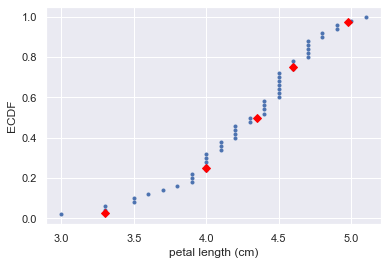

In [6]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red', linestyle='none')
plt.savefig('../images/petal-ecdf.png')

### Box-and-whisker plot
Making a box plot for the petal lengths is unnecessary because the iris data set is not too large and the bee swarm plot works fine. However, it is always good to get some practice. Make a box plot of the iris petal lengths. You have a pandas DataFrame, df, which contains the petal length data, in your namespace. Inspect the data frame df in the IPython shell using ```df.head()``` to make sure you know what the pertinent columns are.

For your reference, the code used to produce the box plot in the video is provided below:
```python
_ = sns.boxplot(x='east_west', y='dem_share', data=df_all_states)
_ = plt.xlabel('region')
_ = plt.ylabel('percent of vote for Obama')
```
In the IPython Shell, you can use ```sns.boxplot?``` or ```help(sns.boxplot)``` for more details on how to make box plots using seaborn.

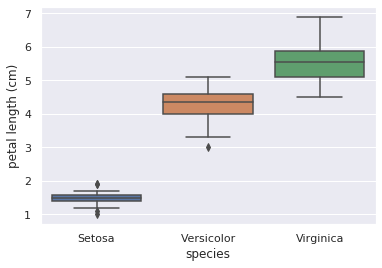

In [14]:
# Create box plot with Seaborn`s default settings
_ = sns.boxplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

## Variance and standard deviation

$$ variance = \dfrac{1}{n}\sum^{n}_{i=1}(x_i - \bar{x})^2 $$

### Computing the variance
It is important to have some understanding of what commonly-used functions are doing under the hood. Though you may already know how to compute variances, this is a beginner course that does not assume so. In this exercise, we will explicitly compute the variance of the petal length of Iris veriscolor using the equations discussed in the videos. We will then use ```np.var()``` to compute it.

In [16]:
# Array of differnces to mean: differences
differences = np.array(versicolor_petal_length - np.mean(versicolor_petal_length))

# Square the differences: diff_sq
diff_sq = differences ** 2

# Compute the mean square differences: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(differences)

# Print the results
print(variance_explicit, variance_np)

0.21640000000000004 0.21640000000000004


### The standard deviation and the variance
As mentioned in the video, the standard deviation is the square root of the variance. You will see this for yourself by computing the standard deviation using ```np.std()``` and comparing it to what you get by computing the variance with ```np.var()``` and then computing the square root.

In [17]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4651881339845204
0.4651881339845204


## Covariance and the Pearson correlation coefficient


$$ covariance = \dfrac{1}{n}\sum^{n}_{i=1}(x_i - \bar{x})(y_i - \bar{y})$$
$$ \begin{align} \rho &= \text{Pearson correlation} = \dfrac{\text{covariance}}{(\text{std of x})(\text{std of y})} \\ &= \dfrac{\text{variability due to codependence}}{\text{independent variability}} \end{align}$$

### Scatter plots
When you made bee swarm plots, box plots, and ECDF plots in previous exercises, you compared the petal lengths of different species of iris. But what if you want to compare two properties of a single species? This is exactly what we will do in this exercise. We will make a scatter plot of the petal length and width measurements of Anderson's Iris versicolor flowers. If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated.

For your reference, the code used to produce the scatter plot in the video is provided below:
```python
_ = plt.plot(total_votes/1000, dem_share, marker='.', linestyle='none')
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('percent of vote for Obama')
```

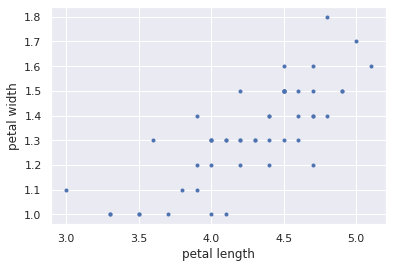

In [20]:
# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('petal length')
_ = plt.ylabel('petal width')

### Computing the covariance
The covariance may be computed using the Numpy function ```np.cov()```. For example, we have two sets of data ```x``` and ```y```, ```np.cov(x, y)``` returns a 2D array where entries ```[0,1]``` and ```[1,0]``` are the covariances. Entry ```[0,0]``` is the variance of the data in x, and entry ```[1,1]``` is the variance of the data in y. This 2D output array is called the covariance matrix, since it organizes the self- and covariance.

In [21]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0, 1]

# Print the length/width covariance
print(petal_cov)


[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


### Computing the Pearson correlation coefficient
In this exercise, you will write a function, ```pearson_r(x, y)``` that takes in two arrays and returns the Pearson correlation coefficient. You will then use this function to compute it for the petal lengths and widths of I. versicolor.

In [23]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays
    
    Args:
        x: arrays
        y: arrays
        
    returns:
        r: int
    """
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)
    
    # Return entry[0, 1]
    return corr_mat[0, 1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169
